# Problem Division by Biomass Amount

In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

SYNTH_DATA_PATH = '../data'     
OUT_SYNTH_DATA_PATH = '../output/clustering/'
FORECAST_FILE = 'Biomass_History_Synthetic.csv'
DISTANCE_FILE = 'Distance_Matrix_Synthetic.csv'

d_matrix = pd.read_csv(os.path.join(SYNTH_DATA_PATH, DISTANCE_FILE), 
                       index_col=0)

d_matrix = d_matrix.values

df_fc = pd.read_csv(os.path.join(SYNTH_DATA_PATH, FORECAST_FILE))

df_fc.head()

,Index,Latitude,Longitude,2018,2019
0,0,24.66818,71.33144,7.387925,5.180296
1,1,24.66818,71.41106,40.431847,42.126945
2,2,24.66818,71.49069,59.181629,73.203232
3,3,24.66818,71.57031,74.536720,101.067352
4,4,24.66818,71.64994,16.531315,26.086885


<Axes: xlabel='Longitude', ylabel='Latitude'>

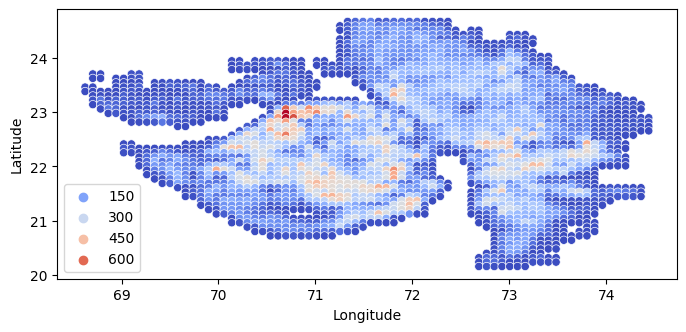

In [73]:
df_avg = df_fc.iloc[:, -2:].mean(axis=1)
plt.figure(figsize=(8, 3.5))
sns.scatterplot(x='Longitude', y='Latitude', 
                data=df_fc, hue=df_avg, 
                palette='coolwarm')

In [74]:
total_fc = df_avg.sum()
N = 5
print("El total forecasted es: {:.2f}".format(total_fc))
print(r"El 80% del total forecasted es: {:.2f}".format(total_fc * .8))
print("Si hay {} refinerias, en cada una se debe procesar entre {:.2f} y {:.2f}".\
       format(N, total_fc * .8 / N, total_fc / N))

El total forecasted es: 329153.50
El 80% del total forecasted es: 263322.80
Si hay 5 refinerias, en cada una se debe procesar entre 52664.56 y 65830.70


In [75]:
fc_areas = pd.DataFrame(df_avg).copy()
fc_areas.columns = ['fc']
fc_areas.reset_index(inplace=True)
fc_areas

,index,fc
0,0,6.284111
1,1,41.279396
2,2,66.192430
3,3,87.802036
4,4,21.309100
...,...,...
2413,2413,5.870414
2414,2414,0.133205
2415,2415,0.042934
2416,2416,1.440317


In [96]:

for i in pd.DataFrame(df_avg).iterrows():
    print(i[1][0])

6.2841107845
41.279396059999996
66.192430495
87.80203628999999
21.30910015
32.670808789999995
46.387863159999995
50.851383205
34.40490246
44.279064180000006
8.7967045305
6.3195648195
5.512565851
0.17422121
0.6801135540000001
27.960894585
89.976852415
141.29174805
143.56011965
74.91889572
104.976791375
108.58068467999999
109.36174009999999
110.57073209999999
99.798206325
81.74075699
43.701753615
34.20755863
3.6262505055
0.2790034785
27.467110634999997
94.2325592
142.49822999999998
147.76303865
125.76275635
105.27255628500001
160.8849716
152.98869324999998
107.30922699999999
73.1219368
86.887882235
95.54247284
99.47706985
24.677713394999998
3.3607417345
0.40969871750000003
0.47480700899999995
17.612124445
88.98602676499999
124.2796936
118.35243985
91.385456105
106.0404625
152.237854
137.12806705
120.1352043
164.74411014999998
129.90349195
104.72807695
88.344631195
75.68128204
17.61096096
10.750844001499999
22.241963385
9.038120748999999
6.610541105499999
7.5590896605
0.433519155
0.108909

In [111]:
for idx, value in pd.DataFrame(df_avg.sort_values(ascending=False)).iterrows():
    print(idx, value[0])

858 698.9203491000001
921 696.0123748999999
922 631.58972165
793 609.7652130499999
1147 569.7189331
862 547.75138855
1652 542.4992218
796 540.7868652
920 520.9183350000001
929 516.35931395
859 514.4873809999999
983 513.7430878
1761 499.83221434999996
1707 493.27525330000003
1629 485.78687285
1866 484.6790924
1090 483.6946259
1301 483.19311525
606 475.11907955
1974 474.79153445
861 470.91784665
1288 464.13519284999995
1867 463.43367005000005
1973 461.36885069999994
1805 460.53239445
1484 458.7045288
1607 453.75039675
1322 451.48728565
1146 447.95462795
2089 443.6032715
1608 441.07913210000004
860 438.96347045000005
1357 435.73500060000003
923 433.6351013
1321 433.1291542
2040 432.6550751
2174 431.35888669999997
797 430.96929935000003
1474 430.53783415
981 430.26145935
1699 427.9571991
1290 425.8870697
1581 425.80893706
1093 421.6947174
1039 419.1561737
794 417.10913085
1804 414.57795715
2039 414.5292053
1291 413.24598695
1936 413.0763397
1179 411.20320130000005
1858 410.14640810000003
1

In [119]:
def partition_equally(values, chunk_size):

    values.sort_values(ascending=False, inplace=True)  # Ordena los valores en orden descendente
    total_sum = sum(values)
    target_sum = total_sum / chunk_size  # Calcula la suma objetivo por grupo

    partitions = [[] for _ in range(chunk_size)]
    indices = [[] for _ in range(chunk_size)]
    print(target_sum)
    current_partition = 0

    for idx, value in pd.DataFrame(values).iterrows():
        if sum(partitions[current_partition]) + value[0] <= target_sum:
            partitions[current_partition].append(value[0])
            indices[current_partition].append(idx)
        else:
            current_partition += 1

    return partitions, indices

# Ejemplo de uso
result, indices = partition_equally(df_avg, 5)
for idx, partition in enumerate(result):
    print(f"Grupo {idx + 1}: {indices[idx][-3:]} {partition[:2]} - SUMA = {sum(partition):.2f}")

65830.70029462957
Grupo 1: [1548, 1356, 2088] [698.9203491000001, 696.0123748999999] - SUMA = 65680.13
Grupo 2: [1286, 939, 1984] [341.1471863, 339.83531189999997] - SUMA = 65789.36
Grupo 3: [865, 1535, 992] [260.81522370000005, 260.0124817] - SUMA = 65727.82
Grupo 4: [2297, 54, 2243] [197.46110535, 197.2154312] - SUMA = 65809.95
Grupo 5: [602, 276, 523] [136.783326145, 136.53242495] - SUMA = 65208.69


In [166]:
d_matrix[d_idxs_clus[k], :][:, d_idxs_clus[k]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [207]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=0).fit(df_fc[['Latitude', 'Longitude']])
df_clus = df_fc.copy()
df_clus['Cluster'] = km.labels_
d_clus = df_clus.groupby('Cluster')['2019'].sum().to_dict()
d_refs = {k: int(v // 100000 + 1)for k, v in d_clus.items()}
print(d_clus)
print(d_refs)
# df_clus['N_Refs'] =
d_idxs_clus = {k: list(ls_idxs) for k, ls_idxs in df_clus.groupby('Cluster').groups.items()}
d_intradist = {k: d_matrix[d_idxs_clus[k], :][:, d_idxs_clus[k]].max() for k in d_idxs_clus.keys()}
for k, v in d_idxs_clus.items():
    print("GROUP: ", k, "- REFINERIES: ", d_refs[k], " - N POINTS: ", len(v), "- BIOMASS: ", d_clus[k], " - MAX INTRADISTANCE:", d_intradist[k])


{0: 93081.018128164, 1: 148786.716628025, 2: 64890.329680368, 3: 78098.956639481}
{0: 1, 1: 2, 2: 1, 3: 1}
GROUP:  0 - REFINERIES:  1  - N POINTS:  676 - BIOMASS:  93081.018128164  - MAX INTRADISTANCE: 424.4196
GROUP:  1 - REFINERIES:  2  - N POINTS:  590 - BIOMASS:  148786.716628025  - MAX INTRADISTANCE: 383.447
GROUP:  2 - REFINERIES:  1  - N POINTS:  501 - BIOMASS:  64890.329680368  - MAX INTRADISTANCE: 570.426
GROUP:  3 - REFINERIES:  1  - N POINTS:  651 - BIOMASS:  78098.956639481  - MAX INTRADISTANCE: 549.8863


c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Cluster by KMeans (computed distances)')

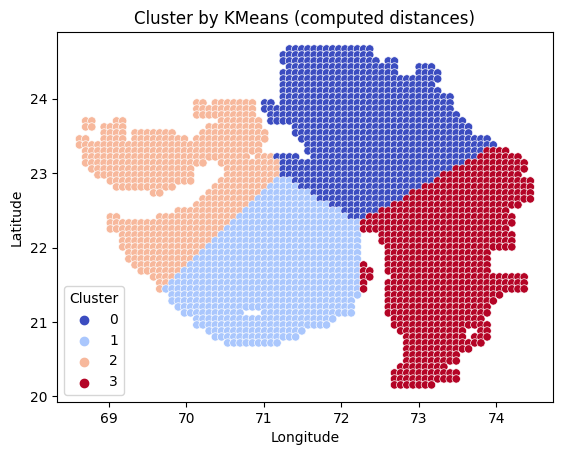

In [209]:
sns.scatterplot(x='Longitude', y='Latitude', 
                data=df_clus, hue='Cluster',
                palette='coolwarm')
plt.title('Cluster by KMeans (computed distances)')

In [267]:
from sklearn.cluster import AgglomerativeClustering
agg_clus = AgglomerativeClustering(n_clusters=25, metric="precomputed", linkage='average').fit(d_matrix, df_fc[['Latitude', 'Longitude', '2019']])
df_clus = df_fc.copy()
df_clus['Cluster'] = agg_clus.labels_
d_clus = df_clus.groupby('Cluster')['2019'].sum().to_dict()

d_depots = {k: int(v // 20000 + 1) if v > 10000 else 0 for k, v in d_clus.items()}
d_refs = {k: int(v // 100000 + 1) if v > 50000 else 0 for k, v in d_clus.items()}

print(d_clus)
print(d_refs)
d_idxs_clus = {k: list(ls_idxs) for k, ls_idxs in df_clus.groupby('Cluster').groups.items()}
d_intradist = {k: d_matrix[d_idxs_clus[k], :][:, d_idxs_clus[k]].max() for k in d_idxs_clus.keys()}
for k, v in d_idxs_clus.items():
    print("GROUP: ", k, "- DEPOTS: ", d_depots[k], " - N POINTS: ", len(v), "- BIOMASS: ", d_clus[k], " - MAX INTRADISTANCE:", d_intradist[k])

print("TOTAL DEPOTS: ", sum(d_depots.values()))
print(f"PCT COVERED: {sum([v for k, v in d_clus.items() if  d_depots[k] != 0]) / sum(d_clus.values()):.2%}")

{0: 7234.95468559, 1: 18237.541085406, 2: 11637.221648983, 3: 15113.424618862, 4: 31545.382251827, 5: 10994.269135061, 6: 2343.972258249, 7: 33745.893000806, 8: 3138.33717789, 9: 18547.532869467, 10: 5243.005283404, 11: 24095.991175602, 12: 10434.031338306, 13: 25481.759082474, 14: 50269.860854779, 15: 26.575114724000002, 16: 19755.729815033, 17: 20072.202569831, 18: 7108.239380096, 19: 4623.618149735, 20: 33905.4933777, 21: 3153.557058087, 22: 22185.683151701, 23: 5215.454528984, 24: 747.291463441}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0}
GROUP:  0 - DEPOTS:  0  - N POINTS:  88 - BIOMASS:  7234.95468559  - MAX INTRADISTANCE: 198.551
GROUP:  1 - DEPOTS:  1  - N POINTS:  133 - BIOMASS:  18237.541085406  - MAX INTRADISTANCE: 178.4506
GROUP:  2 - DEPOTS:  1  - N POINTS:  97 - BIOMASS:  11637.221648983  - MAX INTRADISTANCE: 194.4691
GROUP:  3 - DEPOTS:  1  - N POINTS

C:\Users\alber\AppData\Local\Temp\ipykernel_12360\3571277119.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Longitude', y='Latitude',


Text(0.5, 1.0, 'Cluster by Agglomerative Average Linkage (PREcomputed distances)')

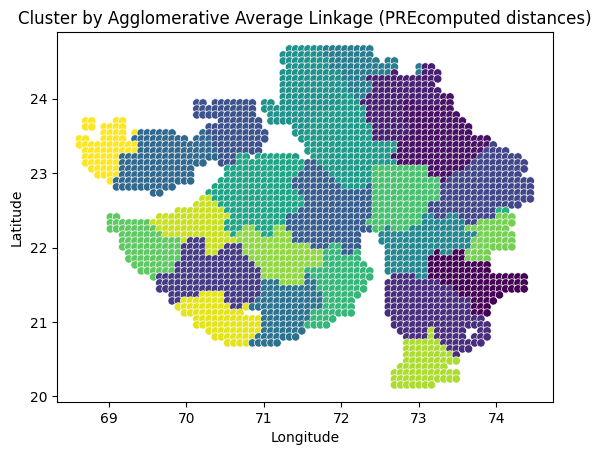

In [269]:
sns.scatterplot(x='Longitude', y='Latitude', 
                data=df_clus, c=df_clus['Cluster'],
                palette='coolwarm')
plt.title('Cluster by Agglomerative Average Linkage (PREcomputed distances)')

In [70]:
# def partition_equally(values, chunk_size):
#     values.sort(reverse=True)  # Ordena los valores en orden descendente
#     total_sum = sum(values)
#     target_sum = total_sum / chunk_size  # Calcula la suma objetivo por grupo

#     partitions = [[] for _ in range(chunk_size)]
#     print(target_sum)
#     current_partition = 0

#     for value in values:
#         if sum(partitions[current_partition]) + value <= target_sum:
#             partitions[current_partition].append(value)
#         else:
#             current_partition += 1

#     return partitions

# # Ejemplo de uso
# values = [15, 10, 8, 7, 6, 5, 3, 2, 1]
# result = partition_equally(values, 3)
# for idx, partition in enumerate(result):
#     print(f"Grupo {idx + 1}: {partition}")


19.0
Grupo 1: [15]
Grupo 2: [8, 7]
Grupo 3: [5, 3, 2, 1]


# Optimization

## Set Variables

In [50]:
import pandas as pd
import logging
import os 
from itertools import product
from mip import Model, xsum, minimize, OptimizationStatus, BINARY
from datetime import datetime
import numpy as np
import sys
sys.path.append('../..')
from utils.config import LS_INDUSTRY_EXT
from utils.help import get_n_closer
from sklearn.cluster import AgglomerativeClustering

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)

SYNTH_DATA_PATH = '../data'
OUT_SYNTH_DATA_PATH = '../output'
FORECAST_FILE = 'Biomass_History_Synthetic.csv' # Forecast File (Synthetic at the beginning) Path
DISTANCE_FILE = 'Distance_Matrix_Synthetic.csv' # Forecast File (Synthetic at the beginning) Path

TRANSPORT_FACTOR_A = .001

DEPOT_LOWER_THRESHOLD = 5000
DEPOT_UPPER_THRESHOLD = 17000
CLUSTER = 1 # Cluster to be optimized

cap_b_j = 20000 # Maximum depot capacity
cap_p_k = 100000 # Maximum production capacity
# n_refineries = d_refs[CLUSTER] # Number of refineries
n_depots = 25 # Number of depots


np.random.seed(42)

## Load and Process Data

In [51]:
# df_diff = df_fc['2018'] - df_fc['2019']
# df_diff.abs().plot(figsize=(15,5))
# df_diff.plot(figsize=(15,5))

In [52]:
# df_diff[df_diff.abs() < 100].plot()

In [53]:
df_fc = pd.read_csv(os.path.join(SYNTH_DATA_PATH, FORECAST_FILE))
df_matrix_orig = pd.read_csv(os.path.join(SYNTH_DATA_PATH, DISTANCE_FILE), 
                            index_col=0)

d_matrix_orig = df_matrix_orig.values

logging.info(f"\nCLUSTERING WITH AGGLOMERATIVE AVERAGE METHOD\n")                  
agg_clus = AgglomerativeClustering(n_clusters=25, linkage='average', metric="precomputed").\
            fit(d_matrix_orig, df_fc[['Latitude', 'Longitude']])
            
df_clus = df_fc.copy()
df_clus['Cluster'] = agg_clus.labels_
df_clus['avg_fc'] = df_clus.loc[:, ['2018', '2019']].mean(axis=1)
total_avg = df_clus['avg_fc'].sum()
d_clus = df_clus.groupby('Cluster')['avg_fc'].sum().to_dict()

d_clus_18 = df_clus.groupby('Cluster')['2018'].sum().to_dict()
d_clus_19 = df_clus.groupby('Cluster')['2019'].sum().to_dict()

d_depots = {k: (v // DEPOT_UPPER_THRESHOLD + 1) if v > DEPOT_LOWER_THRESHOLD else 0 for k, v in d_clus.items()}
d_depots_18 = {k: int(v // DEPOT_UPPER_THRESHOLD + 1) if v > DEPOT_LOWER_THRESHOLD else 0 for k, v in d_clus_18.items()}
d_depots_19 = {k: int(v // DEPOT_UPPER_THRESHOLD + 1) if v > DEPOT_LOWER_THRESHOLD else 0 for k, v in d_clus_19.items()}

# d_depots = {k: for k, v in d_clus.items()}
d_depots_min = {k: np.ceil(np.max([d_clus_18[k], d_clus_19[k]]) * 0.8 / DEPOT_UPPER_THRESHOLD) for k, v in d_clus.items()}
d_depots_max = {k: np.floor(np.min([d_clus_18[k], d_clus_19[k]]) / DEPOT_UPPER_THRESHOLD) for k, v in d_clus.items()}

d_idxs_clus = {k: list(ls_idxs) for k, ls_idxs in df_clus.groupby('Cluster').groups.items()}
d_intradist = {k: d_matrix_orig[d_idxs_clus[k], :][:, d_idxs_clus[k]].max() for k in d_idxs_clus.keys()}

for k, v in d_idxs_clus.items():
    logging.info(f"GROUP: {k} - DEPOTS: {d_depots[k]} - MIN DEPOTS: {d_depots_min[k]:.2f} - MAX DEPOTS: {d_depots_max[k]:.2f} - N POINTS: {len(v)}"+\
                    f" - BIOMASS 2018: {d_clus_18[k]:.2f} - BIOMASS 2019: {d_clus_19[k]:.2f} - MAX INTRADISTANCE: {d_intradist[k]:.2f}")
print()
logging.info(f"TOTAL DEPOTS: {sum(d_depots.values())}")
logging.info(f"TOTAL DEPOTS 18: {sum(d_depots_18.values())}")
logging.info(f"TOTAL DEPOTS 19: {sum(d_depots_19.values())}")
logging.info(f"PCT COVERED (CONSTRAINED): {sum([v for k, v in d_clus.items() if  (d_depots[k] != 0)&(d_depots_min[k]<=d_depots_max[k])]) / sum(d_clus.values()):.2%}")
logging.info(f"PCT COVERED (UNCONSTRAINED): {sum([v for k, v in d_clus.items() if  (d_depots[k] != 0)]) / sum(d_clus.values()):.2%}")

IDX_CLUS = d_idxs_clus[CLUSTER] # Indexes of the cluster
n_depots = d_depots[CLUSTER] # Number of depots

df_fc_clus = df_fc.loc[IDX_CLUS, :].copy()
total_fc_18 = df_fc_clus.loc[:, '2018'].sum()
total_fc_19 = df_fc_clus.loc[:, '2019'].sum()
# df_fc_prep = df_fc.copy()
# df_fc_prep['avg_fc'] = df_fc_prep.loc[:, ['2018', '2019']].mean(axis=1)

df_matrix = df_matrix_orig.iloc[IDX_CLUS, IDX_CLUS]

df_matrix_obj = TRANSPORT_FACTOR_A * df_matrix.copy()

print('Total forecast 2018: {:.2f}'.format(total_fc_18))
print('Total forecast 2019: {:.2f}'.format(total_fc_19))
print('Distance matrix shape: {}'.format(df_matrix.shape))

2023-08-19 01:23:08 - INFO - 
CLUSTERING WITH AGGLOMERATIVE AVERAGE METHOD

2023-08-19 01:23:08 - INFO - GROUP: 0 - DEPOTS: 1.0 - MIN DEPOTS: 1.00 - MAX DEPOTS: 0.00 - N POINTS: 88 - BIOMASS 2018: 9341.66 - BIOMASS 2019: 7234.95 - MAX INTRADISTANCE: 198.55
2023-08-19 01:23:08 - INFO - GROUP: 1 - DEPOTS: 2.0 - MIN DEPOTS: 1.00 - MAX DEPOTS: 1.00 - N POINTS: 133 - BIOMASS 2018: 17219.04 - BIOMASS 2019: 18237.54 - MAX INTRADISTANCE: 178.45
2023-08-19 01:23:08 - INFO - GROUP: 2 - DEPOTS: 1.0 - MIN DEPOTS: 1.00 - MAX DEPOTS: 0.00 - N POINTS: 97 - BIOMASS 2018: 11597.91 - BIOMASS 2019: 11637.22 - MAX INTRADISTANCE: 194.47
2023-08-19 01:23:08 - INFO - GROUP: 3 - DEPOTS: 1.0 - MIN DEPOTS: 1.00 - MAX DEPOTS: 0.00 - N POINTS: 145 - BIOMASS 2018: 17977.85 - BIOMASS 2019: 15113.42 - MAX INTRADISTANCE: 217.17
2023-08-19 01:23:08 - INFO - GROUP: 4 - DEPOTS: 2.0 - MIN DEPOTS: 2.00 - MAX DEPOTS: 0.00 - N POINTS: 127 - BIOMASS 2018: 10543.96 - BIOMASS 2019: 31545.38 - MAX INTRADISTANCE: 187.73
2023-08-


Total forecast 2018: 17219.04
Total forecast 2019: 18237.54
Distance matrix shape: (133, 133)


## Dimensionality Reduction by Distance

In [36]:
## REDUCE CANDIDATES 3: DELETE ARCS LONGER THAN MAXIMUM DISTANCE
MAX_DISTANCE = 600.
# idxs = df_matrix.where(df_matrix <= MAX_DISTANCE)
st_df_matrix = df_matrix.stack().copy()
st_df_matrix = st_df_matrix[st_df_matrix <= MAX_DISTANCE]
df_arcs_ij = pd.DataFrame(st_df_matrix.index.get_level_values(1), 
                          index=st_df_matrix.index.get_level_values(0)).reset_index()
df_arcs_ij.columns = ['i', 'j']
df_arcs_ij['j'] = df_arcs_ij['j'].astype(int)
ls_arcs_ij = df_arcs_ij.values
d_arcs_ij = {}
d_arcs_ji = {}
for key, value in ls_arcs_ij:
    d_arcs_ij.setdefault(key, []).append(value)
    d_arcs_ji.setdefault(value, []).append(key)

ls_arcs_jk = ls_arcs_ij.copy()
d_arcs_jk = d_arcs_ij.copy()
d_arcs_kj = d_arcs_ji.copy()

del df_arcs_ij

ls_biosource = list(d_arcs_ij.keys()) # range(N) # ls_dep_red
ls_depots = list(d_arcs_ji.keys()) # range(N) # ls_dep_red

# Get the forecasted biomass for year 2018 of all the positions
d_bio_18 = df_fc_clus.loc[ls_biosource, '2018']
d_bio_18 = d_bio_18.to_dict()
logging.info(f"Forecasted biomass for year 2018: {total_fc_18}")


d_bio_19 = df_fc_clus.loc[ls_biosource, '2019']
d_bio_19 = d_bio_19.to_dict()
logging.info(f"Forecasted biomass for year 2019: {total_fc_19}")

2023-08-19 00:33:36 - INFO - Forecasted biomass for year 2018: 17219.044418774
2023-08-19 00:33:36 - INFO - Forecasted biomass for year 2019: 18237.541085406003


## Variables Definition

In [37]:
# Get the solution for the optimization problem
logging.info("\nDefine model\n")
m = Model(sense=minimize)
m.threads = -1

# Variables: biomass b_{i, 0}
# 1. All values (forecasted biomass, biomass demand-supply, pellet demand-supply) must be
# greater than or equal to zero.

logging.info("SET VARIABLES")
b_18 = [m.add_var(name=f'b_2018_{i}_{j}', lb=0) for i, j in ls_arcs_ij]
logging.info(f"Variables b_2018: {len(b_18)}")

b_19 = [m.add_var(name=f'b_2019_{i}_{j}', lb=0) for i, j in ls_arcs_ij]
logging.info(f"Variables b_2019: {len(b_19)}")

# p_18 = [m.add_var(name=f'p_2018_{j}_{k}', lb=0) for j, k in ls_arcs_jk]
# logging.info(f"Variables p_2018: {len(p_18)}")

# p_19 = [m.add_var(name=f'p_2019_{j}_{k}', lb=0) for j, k in ls_arcs_jk]
# logging.info(f"Variables p_2019: {len(p_19)}")

x = [m.add_var(name=f'x_{j}', var_type=BINARY) for j in ls_depots]
logging.info(f"Variables x: {len(x)}")

2023-08-19 00:33:37 - INFO - 
Define model

2023-08-19 00:33:37 - INFO - SET VARIABLES
2023-08-19 00:33:37 - INFO - Variables b_2018: 17689
2023-08-19 00:33:37 - INFO - Variables b_2019: 17689
2023-08-19 00:33:37 - INFO - Variables x: 133


In [38]:
153 ** 2

23409

## Constraints

In [39]:

# Constraints:
# 2. The amount of biomass procured for processing from each harvesting site ′𝑖𝑖′ must be less than
# or equal to that site’s forecasted biomass.
logging.info("\nSET CONSTRAINTS")
logging.info("Constraint 2: The processed biomass from each HS <= FC Biomass")
for i in ls_biosource:
    m += xsum(m.var_by_name(f'b_2018_{i}_{j}') for j in d_arcs_ij[i]) <= d_bio_18[i]
    m += xsum(m.var_by_name(f'b_2019_{i}_{j}') for j in d_arcs_ij[i]) <= d_bio_19[i]

logging.info("Constraint 3-4: Can't transport more than storage limit")
for j in ls_depots:
    # 3-4. Can't transport more than storage limit
    m += xsum(m.var_by_name(f'b_2018_{i}_{j}') for i in d_arcs_ji[j]) <= cap_b_j * m.var_by_name(f'x_{j}')
    m += xsum(m.var_by_name(f'b_2019_{i}_{j}') for i in d_arcs_ji[j]) <= cap_b_j * m.var_by_name(f'x_{j}')

# for k in ls_refineries:
#     m += xsum(m.var_by_name(f'p_2018_{j}_{k}') for j in d_arcs_kj[k]) <= cap_p_k * m.var_by_name(f'r_{k}')
#     m += xsum(m.var_by_name(f'p_2019_{j}_{k}') for j in d_arcs_kj[k]) <= cap_p_k * m.var_by_name(f'r_{k}')

# logging.info("Constraint 8: Pellets in = Pellets out")
# for j in ls_depots:
#     # 8. Total amount of biomass entering each preprocessing depot is equal to the total amount of
#     # pellets exiting that depot (within tolerance limit of 1e-03
    
#     m += xsum(m.var_by_name(f'b_2018_{i}_{j}') for i in d_arcs_ji[j])\
#           - xsum(m.var_by_name(f'p_2018_{j}_{k}') for k in d_arcs_jk[j])\
#            <= .001 # * m.var_by_name(f'x_{j}')
    
#     m += xsum(m.var_by_name(f'p_2018_{j}_{k}') for k in d_arcs_jk[j])\
#         - xsum(m.var_by_name(f'b_2018_{i}_{j}') for i in d_arcs_ji[j])\
#         <= .001 # * m.var_by_name(f'x_{j}')

#     m += xsum(m.var_by_name(f'b_2019_{i}_{j}') for i in d_arcs_ji[j])\
#           - xsum(m.var_by_name(f'p_2019_{j}_{k}') for k in d_arcs_jk[j])\
#            <= .001 # * m.var_by_name(f'x_{j}')
    
#     m += xsum(m.var_by_name(f'p_2019_{j}_{k}') for k in d_arcs_jk[j])\
#         - xsum(m.var_by_name(f'b_2019_{i}_{j}') for i in d_arcs_ji[j])\
#         <= .001 #* m.var_by_name(f'x_{j}')

logging.info(f"Constraint 5: Number of depots should be less than or equal to {n_depots}")
# 5. Number of depots should be less than or equal to 25.
m += xsum(m.var_by_name(f'x_{j}') for j in ls_depots) <= n_depots

# logging.info("Constraint 6: Number of refineries should be less than or equal to 5")
# # 6. Number of refineries should be less than or equal to 5.
# m += xsum(m.var_by_name(f'r_{k}') for k in ls_refineries) <= n_refineries

# logging.info(r"Constraint 7: At least 80% of the total forecasted biomass must be processed by refineries each year")
# # 7. At least 80% of the total forecasted biomass must be processed by refineries each year
# m += xsum(m.var_by_name(f'p_2018_{j}_{k}') for j, k in ls_arcs_jk)\
#     >= 0.8 * total_fc_18
# m += xsum(m.var_by_name(f'p_2019_{j}_{k}') for j, k in ls_arcs_jk)\
#     >= 0.8 * total_fc_19

logging.info(r"Constraint 7: At least 80% of the total forecasted biomass must be processed by depots each year")
# 7. At least 80% of the total forecasted biomass must be processed by refineries each year
m += xsum(m.var_by_name(f'b_2018_{i}_{j}') for i, j in ls_arcs_ij)\
    >= 0.8 * total_fc_18
m += xsum(m.var_by_name(f'b_2019_{i}_{j}') for i, j in ls_arcs_ij)\
    >= 0.8 * total_fc_19

logging.info(f'Number of constraints: {m.num_rows}')                  # number of rows (constraints) in the model
logging.info(f'Number of variables: {m.num_cols}')                    # number of columns (variables) in the model
logging.info(f'Number of integer variables: {m.num_int}')             # number of integer variables in the model
logging.info(f'Number of non-zeros in constraint matrix: {m.num_nz}') # number of non-zeros in the constraint matrix

logging.info("\nSET OBJECTIVE FUNCTION")
# Objective function:
m.objective = minimize(
                       xsum(df_matrix_obj.loc[i, str(j)] * (m.var_by_name(f'b_2018_{i}_{j}') + m.var_by_name(f'b_2019_{i}_{j}')) +\
                            - m.var_by_name(f'b_2018_{i}_{j}') - m.var_by_name(f'b_2019_{i}_{j}')\
                            for i, j in ls_arcs_ij) + \
                    #    xsum(df_matrix.loc[j, str(k)] * (m.var_by_name(f'p_2018_{j}_{k}') + m.var_by_name(f'p_2019_{j}_{k}')) +\
                    #         - m.var_by_name(f'p_2018_{j}_{k}') - m.var_by_name(f'p_2019_{j}_{k}')
                    #         for j, k in ls_arcs_jk) + \
                       xsum(2 * cap_b_j*m.var_by_name(f'x_{j}') for j in ls_depots)
                    #    xsum(2 * cap_p_k*m.var_by_name(f'r_{k}') for k in ls_refineries)\
                       )


2023-08-19 00:33:39 - INFO - 
SET CONSTRAINTS
2023-08-19 00:33:39 - INFO - Constraint 2: The processed biomass from each HS <= FC Biomass
2023-08-19 00:33:39 - INFO - Constraint 3-4: Can't transport more than storage limit
2023-08-19 00:33:39 - INFO - Constraint 5: Number of depots should be less than or equal to 2.0
2023-08-19 00:33:39 - INFO - Constraint 7: At least 80% of the total forecasted biomass must be processed by depots each year
2023-08-19 00:33:39 - INFO - Number of constraints: 535
2023-08-19 00:33:39 - INFO - Number of variables: 35511
2023-08-19 00:33:39 - INFO - Number of integer variables: 133
2023-08-19 00:33:39 - INFO - Number of non-zeros in constraint matrix: 106533
2023-08-19 00:33:39 - INFO - 
SET OBJECTIVE FUNCTION


## Solve

In [40]:

logging.info("Solve")
# Solve the problem
# m.max_gap = 0.1
# m.threads = -1

status = m.optimize(max_seconds=200) #m.optimize(max_seconds=100) 

now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
MODEL_NAME = f'model_{dt_string}.lp'
OUTPUT_MODEL_PATH = os.path.join(OUT_SYNTH_DATA_PATH, "models", MODEL_NAME)

logging.info(f"Write model in: {OUTPUT_MODEL_PATH}")
# m.write(OUTPUT_MODEL_PATH)

logging.info(status)
# Check the status and show the solutions
if status == OptimizationStatus.OPTIMAL:
    logging.info('optimal solution cost {} found'.format(m.objective_value))
elif status == OptimizationStatus.FEASIBLE:
    logging.info('sol.cost {} found, best possible: {}'.format(m.objective_value, m.objective_bound))
elif status in [OptimizationStatus.NO_SOLUTION_FOUND, OptimizationStatus.INFEASIBLE]:
    logging.info('no feasible solution found, lower bound is: {}'.format(m.objective_bound))
if status == OptimizationStatus.OPTIMAL or status == OptimizationStatus.FEASIBLE:
    # logging.info('solution:')
    d_sol = {}
    for v in m.vars:
        d_sol.update({v.name: v.x})

    # logging.info("Solution: ", d_sol)
    df_sol = pd.DataFrame.from_dict(d_sol, orient='index', columns=['biomass'])
    # df_sol.to_csv(os.path.join(OUT_SYNTH_DATA_PATH, f'solution_{dt_string}.csv'))

df_sol = df_sol[df_sol['biomass'] > 0]


2023-08-19 00:33:41 - INFO - Solve
2023-08-19 00:37:02 - INFO - Write model in: ../output\models\model_19_08_2023_00_37_02.lp
2023-08-19 00:37:02 - INFO - OptimizationStatus.FEASIBLE
2023-08-19 00:37:02 - INFO - sol.cost 6296.57793775903 found, best possible: 4882.133051853114


In [42]:
df_sol[df_sol['biomass'] != 0]

,biomass
b_2018_194_564,0.822724
b_2018_195_564,1.777043
b_2018_227_564,87.951752
b_2018_228_564,138.941116
b_2018_233_564,19.153748
...,...
b_2019_890_564,167.738434
b_2019_891_564,88.030396
b_2019_892_564,113.127525
b_2019_954_564,157.892838


In [ ]:
total

In [229]:
df_sol.filter(regex='.*_2018_.*', axis=0).sum()

biomass    20000.0
dtype: float64

In [21]:
idxs_depots_sol = df_sol.filter(regex='x_', axis=0).copy()#[df_sol['biomass'] != 0].index
idxs_depots_sol = idxs_depots_sol[idxs_depots_sol['biomass'] == 1]
idxs_depots_sol = idxs_depots_sol.index.str.split('_', expand=True).get_level_values(1).astype(int).unique()
coords = df_fc.loc[idxs_depots_sol, ['Latitude', 'Longitude']].values
idxs_depots_sol

Index([1638, 1796], dtype='int32')

C:\Users\alber\AppData\Local\Temp\ipykernel_1964\2344154299.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Longitude', y='Latitude',


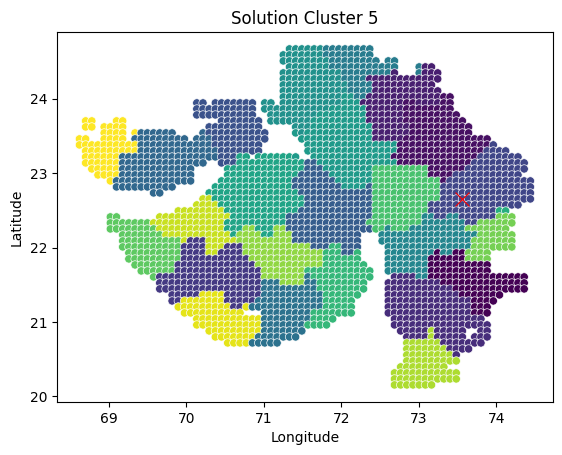

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Longitude', y='Latitude', 
                data=df_clus, c=df_clus['Cluster'],
                palette='coolwarm')
sns.scatterplot(x=coords[:,1], y=coords[:,0], marker='x', s=100, color='red')
plt.title(f'Solution Cluster {CLUSTER}');

C:\Users\alber\AppData\Local\Temp\ipykernel_4508\82457248.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Longitude', y='Latitude',


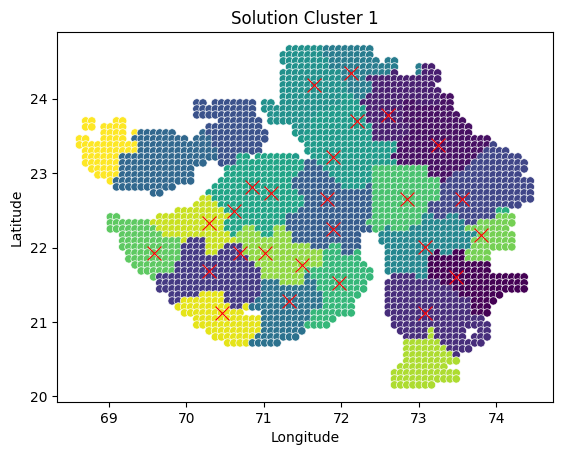

In [54]:
df_out = pd.read_csv(r"../output/clustering/solution_19_08_2023_01_15_49.csv", index_col=0)
df_out.filter(regex='x', axis=0).sum()

idxs_depots_sol = df_out.filter(regex='x_', axis=0).copy()#[df_sol['biomass'] != 0].index
idxs_depots_sol = idxs_depots_sol[idxs_depots_sol['biomass'] == 1]
idxs_depots_sol = idxs_depots_sol.index.str.split('_', expand=True).get_level_values(1).astype(int).unique()
coords = df_fc.loc[idxs_depots_sol, ['Latitude', 'Longitude']].values


import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Longitude', y='Latitude', 
                data=df_clus, c=df_clus['Cluster'],
                palette='coolwarm')
sns.scatterplot(x=coords[:,1], y=coords[:,0], marker='x', s=100, color='red')
plt.title(f'Solution Cluster {CLUSTER}');

In [64]:
for idx in idxs_depots_sol:
    print("Depot: ", idx)
    print(2018, "----------", df_out.filter(regex="b_2018_\d+_"+str(idx), axis=0).sum()[0])
    print(2019, "----------", df_out.filter(regex="b_2019_\d+_"+str(idx), axis=0).sum()[0])
    print("\n")

Depot:  1886
2018 ---------- 9341.658317198
2019 ---------- 7234.95468559


Depot:  564
2018 ---------- 17219.044418774
2019 ---------- 18237.541085406003


Depot:  305
2018 ---------- 11597.907594663999
2019 ---------- 11637.221648982999


Depot:  2187
2018 ---------- 17977.846952803
2019 ---------- 15113.424618862


Depot:  1638
2018 ---------- 4312.331367431
2019 ---------- 13837.471988413003


Depot:  1796
2018 ---------- 6231.625195457001
2019 ---------- 17707.910263414


Depot:  1128
2018 ---------- 9470.832269847999
2019 ---------- 10994.269135061002


Depot:  1106
2018 ---------- 11848.735700550002
2019 ---------- 15315.603388030002


Depot:  1409
2018 ---------- 8413.117478912
2019 ---------- 18430.289612776


Depot:  2081
2018 ---------- 13235.638033094003
2019 ---------- 18547.532869467002


Depot:  79
2018 ---------- 5173.655143393001
2019 ---------- 5243.005283404001


Depot:  1605
2018 ---------- 20000.000000000004
2019 ---------- 20000.000000000015


Depot:  122
2018 ---

In [74]:
ls_x = df_out.filter(regex='x_', axis=0)